# FOM Convergence Analysis

In [1]:
import analysis.core as core
import analysis.fom as fom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


## Step 1: Download .m files and put them into a folder

See SFTP instructions.

## Step 2: Upload those files into a comparator

You need to give the directory where the files are, and a name for the files you're uploding (a description of the parameters for the run. These must be passed in a list; this will be changed later so it can accept single values, but the point of the comparator is to upload multiple sets. This may take a minute, depending on how many files it is uploading. If you think there is an issue, you can pass `verb = True` to see the files it is uploading as it goes.

In [37]:
reload(fom)
dir = ['/home/josh/downloads/scratch/no_wdt','/home/josh/downloads/scratch/all_wdt',
       '/home/josh/downloads/scratch/some_wdt']
name = ['No WDT','All WDT','Some WDT']
my_comp = fom.Comparator(dir,name)

Uploaded 958 files.
Uploaded 492 files.
Uploaded 660 files.


In [52]:
labels = ['INF_FLX']
mat_labels = ['INF_SP0']
my_comp.compare(labels,mat_labels,100)

INF_FLX Group: 1: Some WDT Ratio: 1.0224648623
INF_FLX Group: 2: All WDT Ratio: 1.08595115579
INF_SP0 Entry: (1,1): All WDT Ratio: 1.08875514982
INF_SP0 Entry: (1,2): All WDT Ratio: 2.13343683476
INF_SP0 Entry: (2,1): All WDT Ratio: 2.13343683476
INF_SP0 Entry: (2,2): No WDT Ratio: 0.0 (Divide by zero)


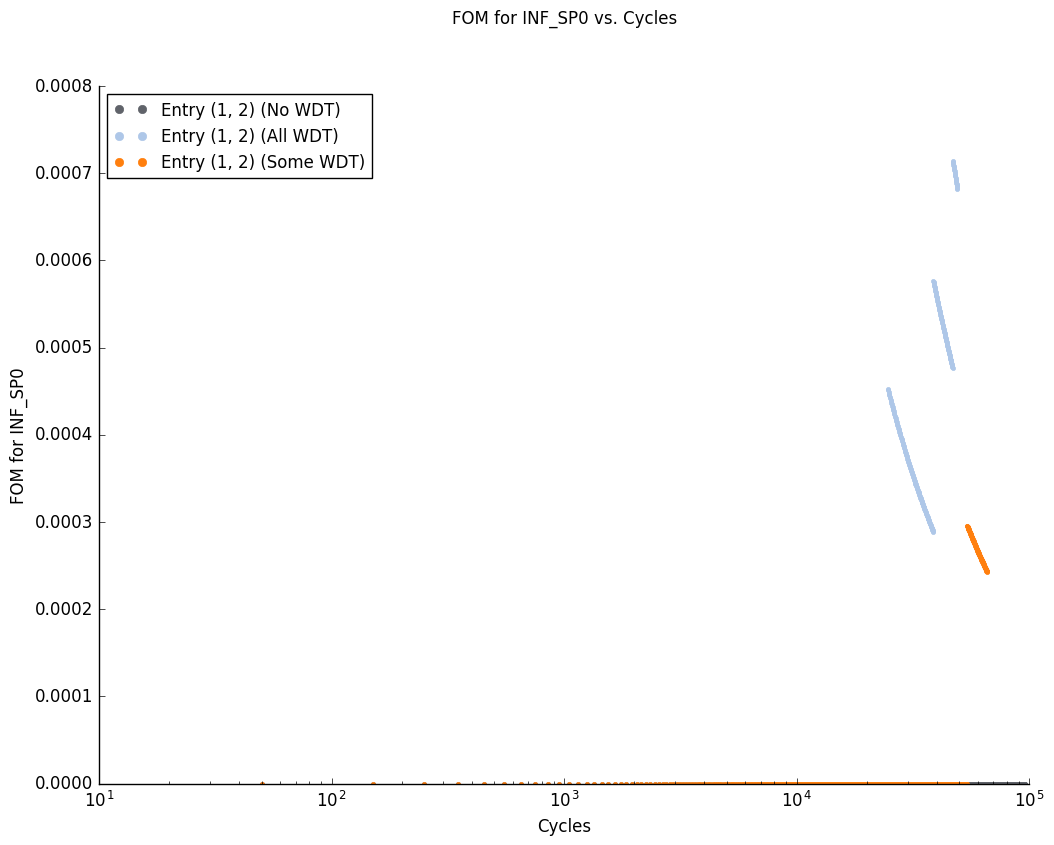

In [51]:
my_comp.plot('INF_SP0', (1,2))

## Step 3: Look at the data

Pick a parameter that you are interested in and plot it! Passing `fom = True` shows the FOM, and `fom = False` will show the relative error. You also must specify groups or matrix entries, depending if the parameter is an array value or a matrix value.

In [38]:
test_analyzer = fom.Analyzer('./tests/fom_data/')

Uploaded 3 files.


In [82]:
data = test_analyzer.__val_vs__('TEST_VAL',1)
data = data[data[:,0].argsort()]
np.mean(data[-2:,1])
print data
print data[-2:,1]

[[  1.00000000e+01   1.05820106e+06]
 [  2.00000000e+01   1.21951220e+06]
 [  3.00000000e+01   3.27868852e+06]]
[ 1219512.19512195  3278688.52459016]


In [28]:
label = 'INF_FLX'
my_comp.data[0].get_data('INF_SP0',2)

array([[ 77250.,      0.],
       [ 74250.,      0.],
       [ 10750.,      0.],
       ..., 
       [ 15050.,      0.],
       [  7150.,      0.],
       [  6650.,      0.]])

## Comparator Class

The comparator will upload all the `.m` files for Serpent 2 runs, and allow comparative plotting of the FOM convergence. It accepts two or more directories, and names for those directories.

In [14]:
reload(fom)
dir1 = '/home/josh/Downloads/no_wdt/'
#dir2 = '/home/josh/Downloads/some_wdt/'
#dir3 = '/home/josh/Downloads/full_wdt'
name1 = 'No WDT'
#name2 = '0.5 WDTTh'
#name3 = 'Full WDT'
#my_comparator = fom.Comparator([dir1, dir2, dir3], [name1, name2, name3])
#my_comparator = fom.Comparator([dir1, dir2], [name1, name2])
my_comparator = fom.Comparator([dir1], [name1])

Uploaded 1450 files.


As with the Analyzer class, it accepts either group numbers for Serpent output parameters, or indices when the output parameter is a matrix.

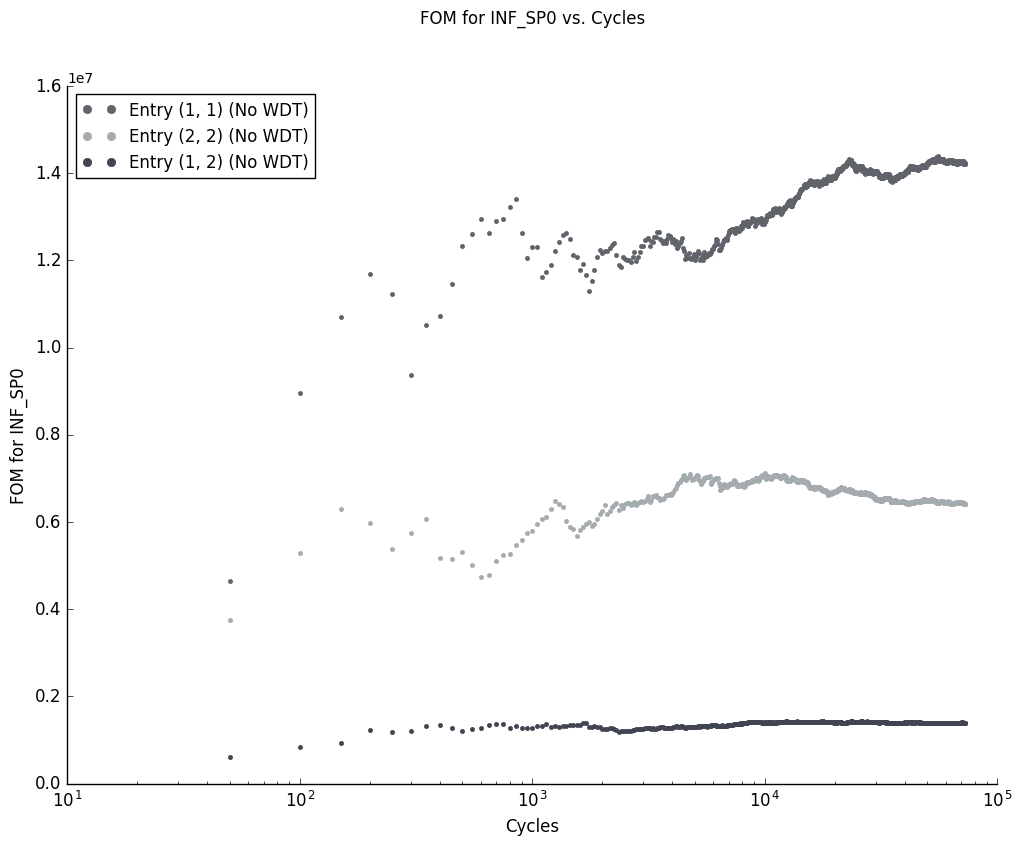

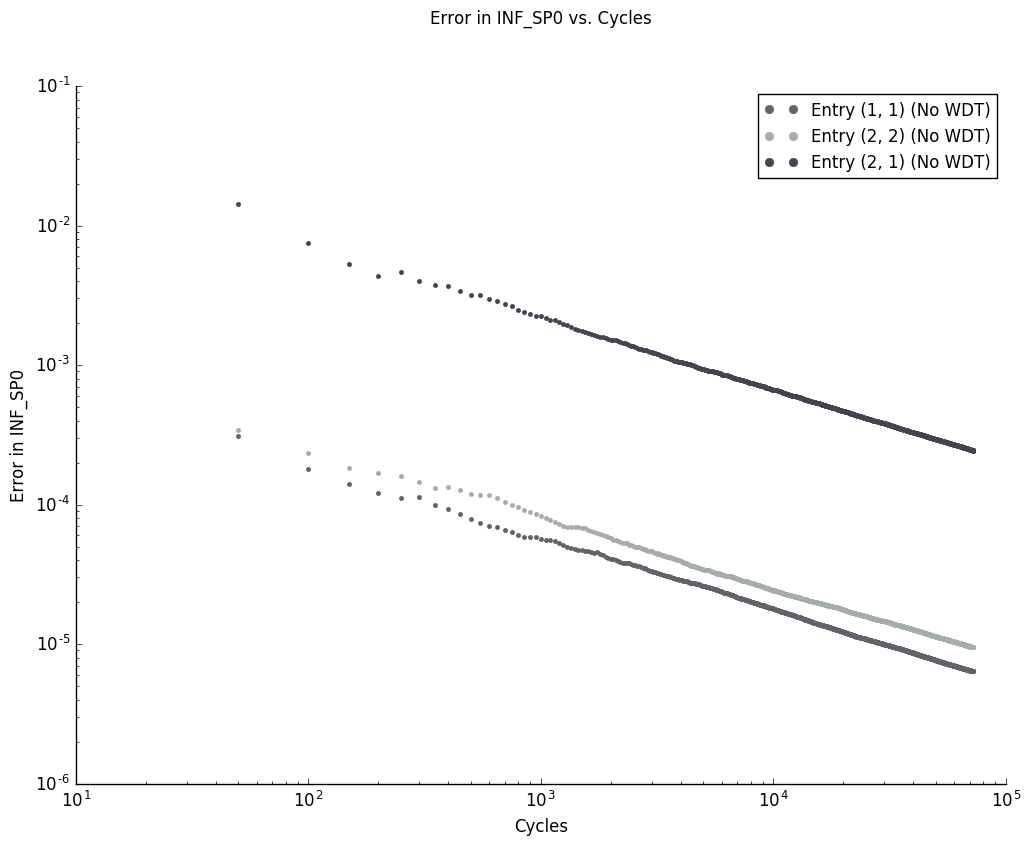

In [19]:
label = 'INF_SP0'
my_comparator.plot(label, [(1,1),(2,2),(1,2)], fom=True)
my_comparator.plot(label, [(1,1),(2,2),(2,1)], fom=False)

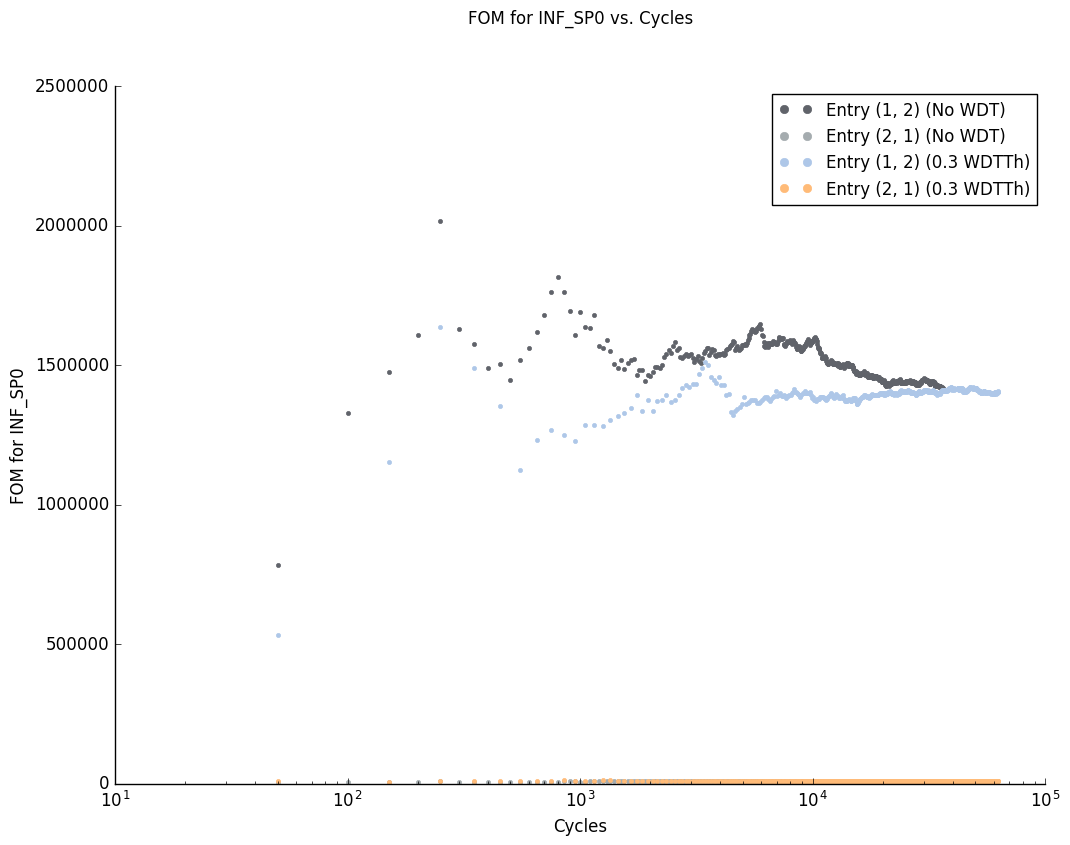

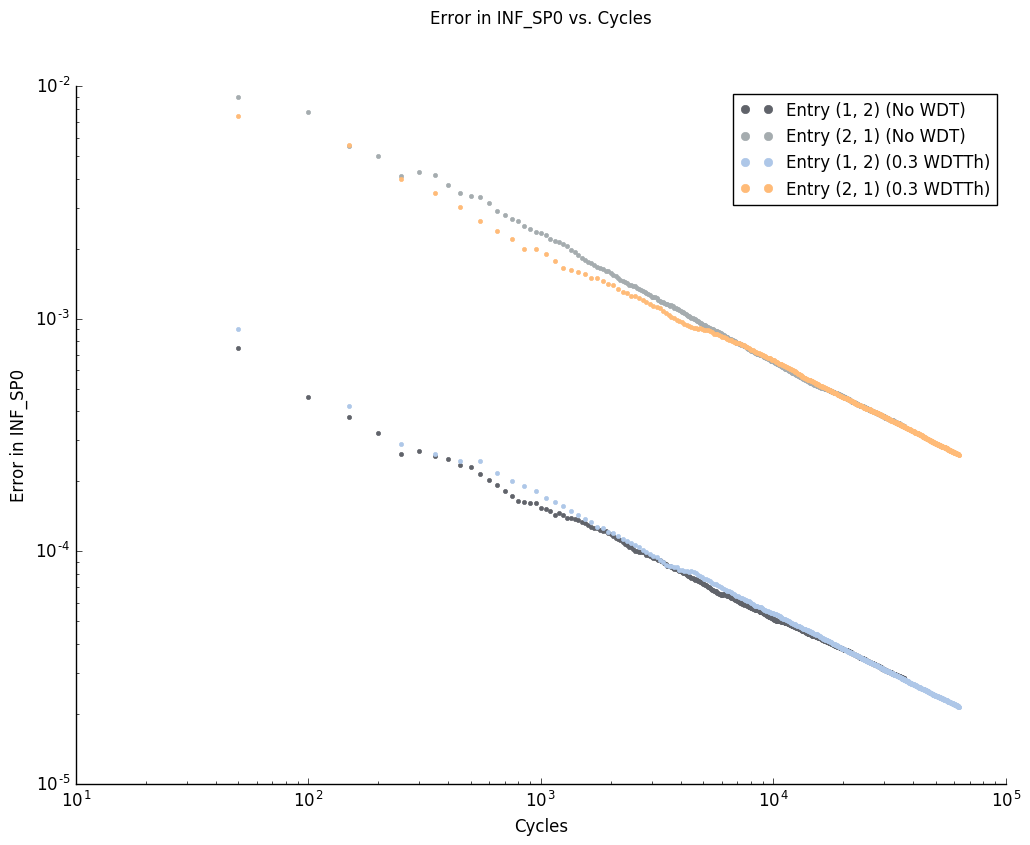

In [11]:
label = 'INF_SP0'
my_comparator.plot(label, [(1,2),(2,1)], cycle=True, fom=True)
my_comparator.plot(label, [(1,2),(2,1)], cycle=True, fom=False)

#### Diagonal Entries

In [37]:
my_comparator.data[0].name

'No WDT'

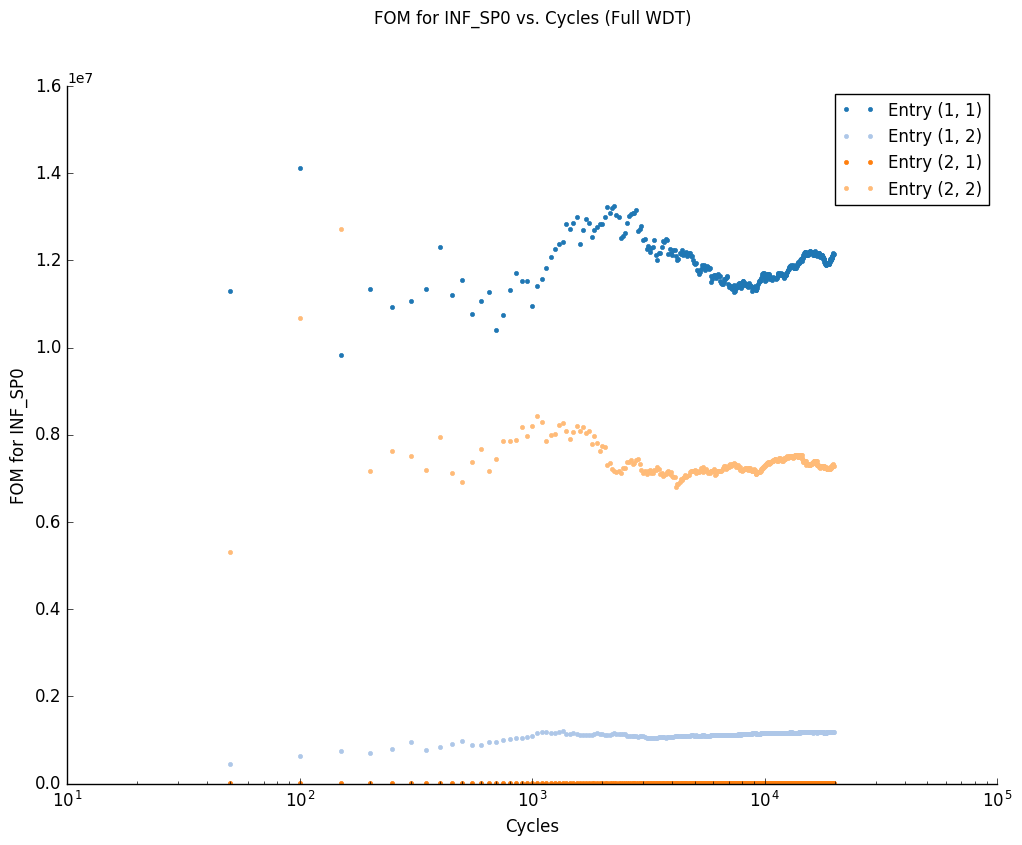

In [40]:
data = my_comparator.data[2].get_data('INF_SP0', [(1,1),(1,2),(2,1),(2,2)], fom = True, plot = True, cycle = True)

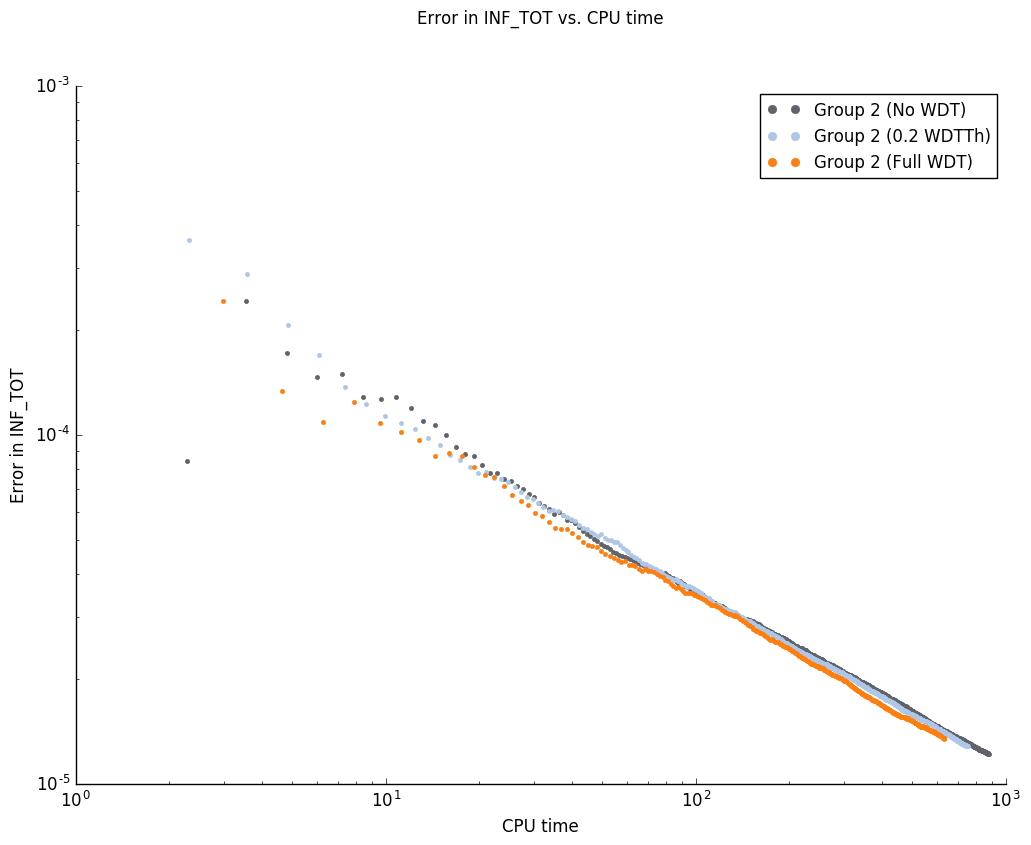

In [51]:
my_comparator.plot('INF_TOT', 2, fom = False, cycle = False)

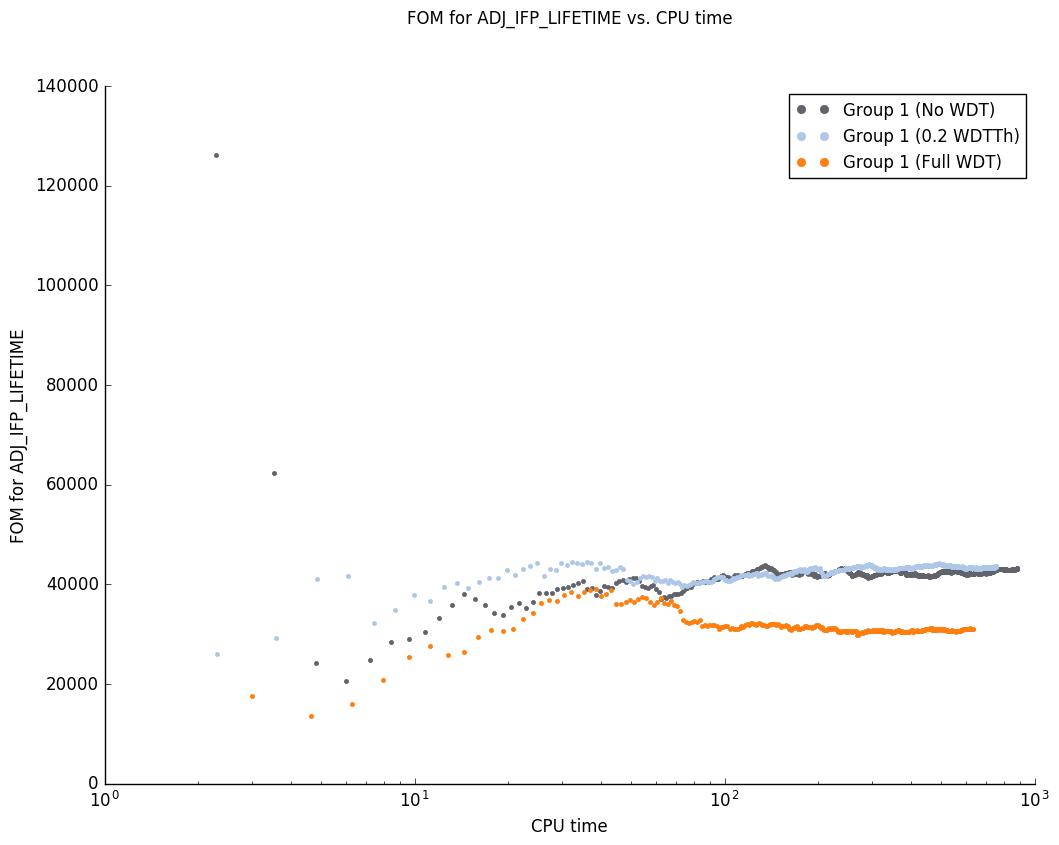

In [59]:
my_comparator.plot('ADJ_IFP_LIFETIME', 1, fom = True, cycle = False)

In [20]:
import analysis.widgets as widgets


In [21]:
%matplotlib notebook
reload(widgets)
widgets.comparatorWidget(my_comparator)

TypeError: plot() takes at least 3 arguments (4 given)

In [13]:
arr = np.array([1])
arr[0] == 1

True